In [64]:
import serial
import time
import sys
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import struct

# Change your usb name here
ser = serial.Serial('/dev/ttyUSB2', 115200, timeout=0.1)

In [65]:
# Command sending function
def send_cmd(btarr):
    if len(btarr) > 10:
        ser.write(btarr[0:10])
    else:
        btarr.extend(bytearray(10 - len(btarr)))
        ser.write(btarr)

In [66]:
from soundfile import read as read_sound

In [67]:
!ls

Queen-WeAreTheChampions.mp3  Queen-WeAreTheChampions.ogg  terminal.ipynb


In [68]:
audio,rate = read_sound("Queen-WeAreTheChampions.ogg")

In [69]:
from IPython.display import Audio

In [70]:
audio_mono = audio[:,0]+audio[:,1]/2

In [71]:
Audio(audio_mono, rate=rate)

MemoryError: 

In [72]:
q = np.quantile(a = audio_mono, q = [0.1, 0.9])

In [91]:
audio_mono_clipped=np.clip(audio_mono,a_min=q[0],a_max=q[1])

In [113]:
fft_audio = np.fft.hfft(audio_mono_clipped)

In [114]:
hist = np.histogram(fft_audio, bins=32)[1]

In [115]:
BLINKING_FREQ = 10*4

In [98]:
from time import sleep

In [ ]:
a=np.zero[] 115200/2 

In [112]:

for j in np.array_split(audio_mono_clipped, int(len(audio_mono_clipped)/rate)*BLINKING_FREQ):
    j = np.mean(m)
        np.mean(m);
    for i in np.digitize(j, hist):
        send_cmd(bytearray([0x01, i]))
    sleep(1/BLINKING_FREQ)

KeyboardInterrupt: 

In [30]:
send_cmd(bytearray([0x01, 0x01, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00]))

string = ser.read(10)
print(string)

b'OK'


In [ ]:
for k, m in enumirate(np.array_split(in np.fft.hfft(j),10)):

In [11]:
# Set pwm
send_cmd(bytearray([0x01, 0x50]))

string = ser.read(10)
print(string)

b'OK'


In [33]:
# Read button pin
send_cmd(bytearray([0x02]))

string = ser.read(10)
print(string)

b'HIGH'


In [39]:
# Read ADC value
send_cmd(bytearray([0x03]))

buf = ser.read()
if len(buf) > 0 :
    adc = ord(buf)

In [40]:
adc

0

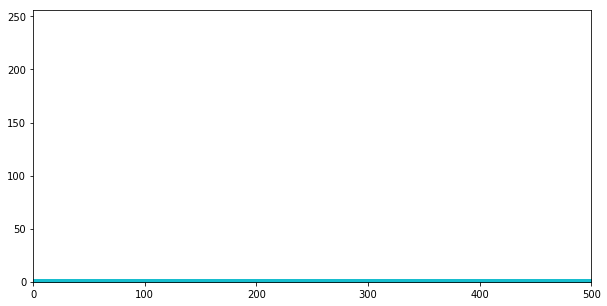

In [31]:
# Plot ADC in realtime
points = 500
y = np.zeros(points)
x = np.zeros(points)
plt.figure(figsize=(10, 5))
axes = plt.gca()
axes.set_xlim([0, points])
axes.set_ylim([0, 256])

for i in range(points):
    send_cmd(bytearray([0x03]))
    buf = ser.read()
    if len(buf) > 0 :
        adc = ord(buf)
        x[i] = i
        y[i] = adc
        plt.scatter(x, y)
        time.sleep(0.02)